In [ ]:
!pip install sentence-transformers
!pip install pymorphy2
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd
import gensim
import gensim.downloader as api
from sklearn.utils import shuffle
import zipfile
import sys
import requests, io
import re 
import random
import numpy as np
import matplotlib.pyplot as plt

import json
import pandas as pd
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim.models as models
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors
import gensim.downloader as api
import sentence_transformers
from sentence_transformers import SentenceTransformer
from sklearn.utils import shuffle
import zipfile
import sys
import requests, io
import re 
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
# from google.colab import files

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def get_states(sim, df, match_threshold):
    (TP, FP, FN, TN) = (0, 0, 0, 0)
    for i in range(len(sim)):
        if df['need_match'][i:i+1].item():
            if sim[i] >= match_threshold: 
                TP += 1
            else:
                FN += 1
        else:
            if sim[i] >= match_threshold: 
                FP += 1
            else:
                TN += 1
    
    return (TP, FP, FN, TN)
        

def calc_f1_score(sim, df, match_threshold):
    (TP, FP, FN, TN) = get_states(sim, df, match_threshold)
#     print(TP, FP, FN, TN)
    return round(float(2*TP / (2*TP + FP + FN)), 3)

import re


def sent_preprocess(text:str):
    preprocessed_text = sent_tokenize(text)
    for i in range(len(preprocessed_text)):
        res = re.sub(r'([^\w\s])|([0-9]+)', '', preprocessed_text[i])
        # res = re.sub(r'', '' ,  res)
        preprocessed_text[i] = (preprocessed_text[i], res)
    
    preprocessed_text = list(filter(lambda sentence: sentence[0] != '', preprocessed_text))
    
    return preprocessed_text



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
match_df_path = '/content/drive/MyDrive/4th_coursre/Диплом/Colab/colab-notebooks/match-1.json'
unmatch_df_path = '/content/drive/MyDrive/4th_coursre/Диплом/Colab/colab-notebooks/unmatch-1.json'

In [ ]:
match_df = pd.read_json(match_df_path)
unmatch_df = pd.read_json(unmatch_df_path)

# Трансформер: нахождение cos_sim

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

In [ ]:
print(match_df["text_proj"][0])
text = match_df["text_proj"][0]

Разработка системы движения роя дронов в пространстве. Объект исследования: движения роя Предмет исследования: безопасность движения каждого участника роя в штатных и экстренных случаях Цель : обеспечить безопасность каждому участнику роя дронов во время выполнения манёвров и иных задач, для выполнения которых предполагается привлечение несколько дронов. Проблема: обеспечивать каждого дрона самостоятельной системой избегания препятствий дорого и неэффективно Формулировка задачи: необходимо сформулировать аппаратную и программную конфигурацию роя дронов так, чтобы в процессе выполнения полётной задачи с привлечением роя, обеспечивалась безопасность каждого участника роя индивидуально или в групповом взаимодйствии. Формулирование аппаратной части подразумевает ответ на вопрос, сколько дронов в рою и какими датчиками должны быть оснащены для достижения тех или иных показателей эффективности. Формирование программной конфигурации подразумевает реализацию алгоритма действий в штатной и нешт

In [ ]:
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)
sentences1 =sent_preprocess(match_df["text_rp"][0])
sentences2 = sent_preprocess(match_df["text_rp"][0])
print(sentences1)

[('Данный курс знакомит слушателей с основами управления беспилотными автомобилями.', 'Данный курс знакомит слушателей с основами управления беспилотными автомобилями'), ('Рассматриваются основные компоненты таких сиcтем: модели и методы восприятия информации при помощи сенсоров или человеко-машинного интерфейса; методы определения собственного положения на известной и неизвестной карте; методы планирования пути (в том числе на графах и не на графах); фреймворк, подходящий для разработки собственных решений для беспилотных транспортных средств.', 'Рассматриваются основные компоненты таких сиcтем модели и методы восприятия информации при помощи сенсоров или человекомашинного интерфейса методы определения собственного положения на известной и неизвестной карте методы планирования пути в том числе на графах и не на графах фреймворк подходящий для разработки собственных решений для беспилотных транспортных средств'), ('Данный курс знакомит с уровнями автономности беспилотных средств, с осн

In [ ]:
embeddings1 =  tokenizer(sentences1[0][0], return_tensors='pt')

In [ ]:
embeddings2 = tokenizer(sentences2[0][0], return_tensors='pt')

In [ ]:
from sentence_transformers import  util

In [ ]:
# util.cos_sim(embeddings1, embeddings2)

In [ ]:
rubert = SentenceTransformer('DeepPavlov/rubert-base-cased')

No sentence-transformers model found with name C:\Users\Andrey/.cache\torch\sentence_transformers\DeepPavlov_rubert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\Andrey/.cache\torch\sentence_transformers\DeepPavlov_rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly id

In [ ]:
model_ = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [ ]:
def get_train_test_dfs_for_f1(df_match, df_unmatch): 
    df_match = shuffle(df_match)
    df_unmatch = shuffle(df_unmatch)
    
    df_train_f1 = pd.concat([pd.DataFrame(df_match[0:len(df_match) // 2]), pd.DataFrame(df_unmatch[0:len(df_unmatch) // 2])], axis=0)
    df_test_f1 = pd.concat([pd.DataFrame(df_match[len(df_match) // 2 : ]), pd.DataFrame(df_unmatch[len(df_unmatch) // 2 : ])], axis=0)
    return (df_train_f1, df_test_f1)

In [ ]:
def compare_sentences_from_texts(text_1, text_2, top_num=5, count_of_comparings=3, model=model_):
    sentences_rp = sent_preprocess(text_1)
    sentences_proj = sent_preprocess(text_2)

    def comp(e):
        return e['cos_sim']

    top_number = top_num
    sentences_proj_embeddings = []

    if len(sentences_rp) > count_of_comparings:
        sentences_rp = sentences_rp[:count_of_comparings]

    for sentence_proj in sentences_proj:
        sentences_proj_embeddings += [model.encode(sentence_proj[1], convert_to_tensor=True)]

    for sentence_rp in sentences_rp:
        sentence_rp_embedding = model.encode(sentence_rp[1], convert_to_tensor=True)
        sim = []
        print(f'RP sentence: {sentence_rp[0]}')
        for i in range(len(sentences_proj_embeddings)):
            sim += [{ 'proj': sentences_proj[i][0], 
                      'cos_sim': float(sentence_transformers.util.cos_sim( sentence_rp_embedding, sentences_proj_embeddings[i]))
                    }]

        sim.sort(key=comp, reverse=True)
        print(f'top {top_number} similarities:')
        count = top_number
        if(len(sim) < top_number):
            count = len(sim)
          
        for i in range(count):
            print('proj: {}\nsim: {}\n'.format(sim[i]['proj'], round(sim[i]['cos_sim'], 3)))
        print('-'*len(sentences_rp[0][0]))

In [ ]:
df_train_f1, df_test_f1 = get_train_test_dfs_for_f1(match_df, unmatch_df)

texts_rp = df_train_f1['text_rp'].reset_index().drop(labels='index', axis=1).squeeze()
texts_proj = df_train_f1['text_proj'].reset_index().drop(labels='index', axis=1).squeeze()

In [ ]:
df_test_f1

In [ ]:
compare_sentences_from_texts(texts_rp[0], texts_rp[2], top_num=3, count_of_comparings=2, model=model_)

In [ ]:
from joblib import Memory

mem = Memory(cachedir='/content/drive/MyDrive/4th_coursre/Диплом/Colab/cache')

<ipython-input-34-c2cffdfde726>:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/content/drive/MyDrive/4th_coursre/Диплом/Colab/cache'", use "location='/content/drive/MyDrive/4th_coursre/Диплом/Colab/cache'" instead.
  mem = Memory(cachedir='/content/drive/MyDrive/4th_coursre/Диплом/Colab/cache')


In [ ]:
from functools import lru_cache

def compare_sentences_from_texts(text_1, text_2, model):
    sentences_rp = sent_preprocess(text_1)
    sentences_proj = sent_preprocess(text_2)

    def comp(e):
        return e['cos_sim']

    sentences_proj_embeddings = []

    for sentence_proj in sentences_proj:
        sentences_proj_embeddings += [model.encode(sentence_proj[1], convert_to_tensor=True)]
    

    max_sims = []
    for sentence_rp in sentences_rp:
        sentence_rp_embedding = model.encode(sentence_rp[1], convert_to_tensor=True)
        sim = []
        # print(f'RP sentence: {sentence_rp[0]}')
        for i in range(len(sentences_proj_embeddings)):
            sim += [{ 'proj': sentences_proj[i][0], 
                      'cos_sim': float(sentence_transformers.util.cos_sim( sentence_rp_embedding, sentences_proj_embeddings[i]))
                    }]

        # sim.sort(key=comp, reverse=True)
        max_sims.append(max(sim, key=comp)['cos_sim'])

    # print(max_sims)
    return np.mean(max_sims)

        

In [ ]:
texts_rp

In [ ]:
len(texts_proj)

34

In [ ]:
compare_sentences_from_texts(texts_rp[0], texts_proj[2], model=model_)


0.4005756502757307

In [ ]:
# texts_rp[0]

In [ ]:
texts_proj[2]

'Тестирование и документирование стенда виртуальных рабочих мест (VDI) под российским ПО виртуализации. Тестирование стенда VDI под российским ПО виртуализации, разработка технической документации по результатам тестирования. Обязательно должен: знать:. уметь:. владеть:. Желательно должен: знать:. уметь:. владеть:. В результате получит: знания: Современных аппаратных и программных средств виртуализации, знание ГОСТ. умения: Использования современных программных средств виртуализации. опыт: Тестирования и разработки технической документации.'

In [ ]:
def get_shuffled_dataframe(df_match, df_unmatch, need_shuffle=True):
    df_match = shuffle(df_match)
    df_unmatch = shuffle(df_unmatch)
    res = pd.concat([pd.DataFrame(df_match), pd.DataFrame(df_unmatch)], axis=0)
    res = res.reset_index().drop(labels='index', axis=1)
    return res

In [ ]:
def maximize_f1_score(texts_rp, texts_proj, df_f1, model):
    threshold = 0
    thresholds = []
    max_ = 0
    step_max_ = 0
    step = 0.02
    h = step
    steps = np.linspace(0, 1, num=int(1/h))
    steps = np.round(steps, 2)
    sim = []
    for i in range(len(texts_rp)):
      # print(texts_rp[i])
      # print(texts_proj[i])
      sim += [compare_sentences_from_texts(texts_rp[i], texts_proj[i], model)]

    for i in steps:
        threshold = calc_f1_score(sim, df_f1, h)
        thresholds.append(threshold)
        if threshold > max_:
            max_ = threshold
            step_max_ = h
        h += step
    
    return (steps, thresholds, max_, step_max_)

In [ ]:
match_unmatch_df = pd.read_json('/content/drive/MyDrive/4th_coursre/Диплом/Colab/colab-notebooks/all_examples.json')
df_match = match_unmatch_df[ match_unmatch_df['need_match'] == True]
df_unmatch = match_unmatch_df[match_unmatch_df['need_match'] == False]
df_train_f1, df_test_f1 = get_train_test_dfs_for_f1(df_match, df_unmatch)

# df_train_f1 = get_shuffled_dataframe(df_train_f1)
texts_rp = df_train_f1['text_rp'].reset_index().drop(labels='index', axis=1).squeeze()
texts_proj = df_train_f1['text_proj'].reset_index().drop(labels='index', axis=1).squeeze()

texts_rp_2 = df_test_f1['text_rp'].reset_index().drop(labels='index', axis=1).squeeze()
texts_proj_2 = df_test_f1['text_proj'].reset_index().drop(labels='index', axis=1).squeeze()

In [ ]:
len(df_match)

35

In [ ]:
# df_train_f1
import time

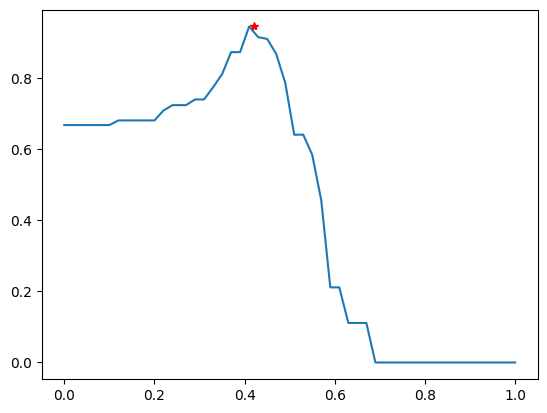

<Figure size 1000x300 with 0 Axes>

Preprocessing time: 57.7304 secs
Max f1-score is 0.944
Cutoff: 0.4200000000000001


In [ ]:
start = time.perf_counter()
steps, thresholds, max_, step_max_ = maximize_f1_score(texts_rp, texts_proj, df_train_f1, model_)
plt.plot(steps, thresholds)
plt.plot(step_max_, max_, 'r*')
plt.figure(figsize=(10,3))
plt.show()
end = time.perf_counter()

print(f'Preprocessing time: {end - start:0.4f} secs')
print(f'Max f1-score is {max_}\nCutoff: {step_max_}')

In [ ]:
def calc_f1_score(sim, df, match_threshold):
    (TP, FP, FN, TN) = get_states(sim, df, match_threshold)
#     print(TP, FP, FN, TN)
    return round(float(2*TP / (2*TP + FP + FN)), 3)

In [ ]:
sim = []
for i in range(len(texts_rp_2)):
  # print(texts_rp[i])
  # print(texts_proj[i])
  sim += [compare_sentences_from_texts(texts_rp_2[i], texts_proj_2[i], model_)]

In [ ]:
calc_f1_score(sim, df_test_f1, 0.42)

0.833

In [ ]:
df_f1 = get_shuffled_dataframe(df_match, df_unmatch)

In [ ]:
df_f1

,id_rp,id_proj,name_rp,name_proj,text_rp,text_proj,need_match
0,4776,8,Web-технологии,"Разработка ИС ""Расписание"" / ""Деканат""",Курс «Web-технологии» охватывает широкий спект...,"Разработка ИС ""Расписание"" / ""Деканат"". Информ...",True
1,8010,8011,Интеллектуальные технологии управления рисками,руководитель отдела международной лингвистики ...,Дисциплина предназначена для подготовки специа...,Торгово-промышленная группа «ТАЙПИТ» приглаша...,True
2,1557,513,Технологии бережливого производства,Главный специалист Проектного офиса по обучени...,Целью освоения дисциплины «Бережливые технолог...,Главный специалист Проектного офиса (внедрение...,True
3,1098,56,Обработка изображений и компьютерное зрение (...,Практика в проектах по автономному транспорту ...,"Рассматриваются основные задачи, модели, метод...",Практика в проектах по автономному транспорту ...,True
4,985,8,Основы компьютерного дизайна,"Разработка ИС ""Расписание"" / ""Деканат"".",В курсе рассматриваются свойства зрительного в...,"Разработка ИС ""Расписание"" / ""Деканат"". Информ...",True
...,...,...,...,...,...,...,...
65,9011,9012,Операционные системы,Специалист отдела методологии,Дисциплина рассматривает основные принципы фун...,"Восток.Софт – молодая IT-компания, в которую д...",False
66,9001,9002,Солнечная гетероструктурная фотоэнергетика,Инженер мониторинга.,В результате изучения дисциплины будут рассмот...,Инженер мониторинга. Вам предстоит: • монитори...,False
67,6093,56,Математический анализ,Практика в проектах по автономному транспорту ...,Математический анализ - ключевой раздел высшей...,Практика в проектах по автономному транспорту ...,False
68,2648,46,Конфликтология,Разработка интеллектуальных модулей обработки ...,Дисциплина «Конфликтология» знакомит с основны...,Разработка интеллектуальных модулей обработки ...,False


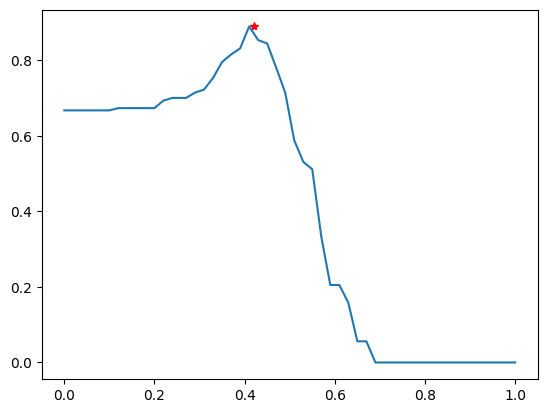

<Figure size 1000x300 with 0 Axes>

Max f1-score is 0.889
Cutoff: 0.4200000000000001


In [ ]:

texts_rp = df_f1['text_rp'].reset_index().drop(labels='index', axis=1).squeeze()
texts_proj = df_f1['text_proj'].reset_index().drop(labels='index', axis=1).squeeze()


steps, thresholds, max_, step_max_ = maximize_f1_score(texts_rp, texts_proj, df_f1, model_)
plt.plot(steps, thresholds)
plt.plot(step_max_, max_, 'r*')
plt.figure(figsize=(10,3))
plt.show()

print(f'Max f1-score is {max_}\nCutoff: {step_max_}')

In [113]:



cutoff = step_max_
sim = []
texts_rp = df_f1['text_rp']
texts_proj = df_f1['text_proj']

for i in range(len(texts_rp)):
  sim += [compare_sentences_from_texts(texts_rp[i], texts_proj[i], model_) >= cutoff]

In [114]:
actual =  df_f1['need_match'].to_list()
predicted = sim

print(predicted)

[False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False]


In [123]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

def plot_confusion_matrix(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
  cm_display.plot()
  plt.show()


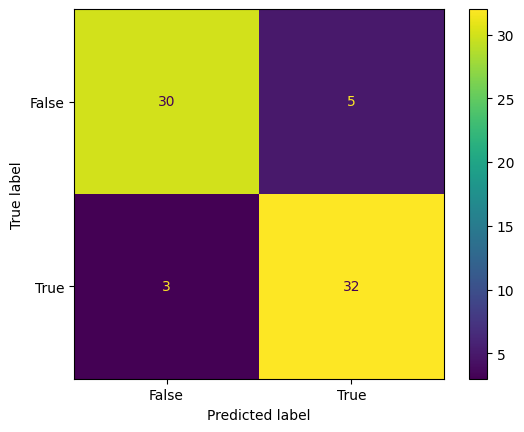

In [124]:
plot_confusion_matrix(actual, predicted)

In [125]:
metrics.f1_score(actual, predicted)

0.888888888888889

## Leave One Out


In [ ]:
def get_train_test_dataframes(df_match, df_unmatch, need_shuffle=True):
  # метод Leave One Out позволяет  
    if need_shuffle:
      df_match = shuffle(df_match)
      df_unmatch = shuffle(df_unmatch)

    df_train_f1 = pd.concat([pd.DataFrame(df_match[0:len(df_match) // 2]), pd.DataFrame(df_unmatch[0:len(df_unmatch) // 2])], axis=0)
    df_test_f1 = pd.concat([pd.DataFrame(df_match[len(df_match) // 2 : ]), pd.DataFrame(df_unmatch[len(df_unmatch) // 2 : ])], axis=0)
    df_train_f1 = df_train_f1.reset_index().drop(labels='index', axis=1)
    df_test_f1 = df_test_f1.reset_index().drop(labels='index', axis=1)
    return (df_train_f1, df_test_f1)

In [ ]:
df_f1 = get_shuffled_dataframe(df_match, df_unmatch)


In [ ]:
df_f1

,id_rp,id_proj,name_rp,name_proj,text_rp,text_proj,need_match
0,1005,40,АНАЛИЗ ДАННЫХ В ИСКУССТВЕННОМ ИНТЕЛЛЕКТЕ,Роботизированная система машинного творчества ...,Освещаемые в курсе теоретические и прикладные ...,Роботизированная система машинного творчества ...,True
1,1016,46,Интеллектуальные системы,Разработка интеллектуальных модулей обработки ...,Рассматриваются основные понятия теории интелл...,Разработка интеллектуальных модулей обработки ...,True
2,1916,41,Разработка программного обеспечения для робот...,Разработка подводного телеуправляемого робота ...,Цели изучения курса состоят в формировании зн...,Разработка подводного телеуправляемого робота ...,True
3,4530,4999,Информационные технологии проектирования радио...,Инженер,Целями изучения дисциплины является приобрете...,Обязанности: Участие в приемосдаточных испытан...,True
4,4776,8,Web-технологии,"Разработка ИС ""Расписание"" / ""Деканат""",Курс «Web-технологии» охватывает широкий спект...,"Разработка ИС ""Расписание"" / ""Деканат"". Информ...",True
...,...,...,...,...,...,...,...
65,3490,57,"Спецификация, проектирование и архитектура про...",Стажировка в Digital Security по аудиту защищё...,"Дисциплина «Спецификация, проектирование и арх...",Стажировка в Digital Security по аудиту защищё...,False
66,9011,9012,Операционные системы,Специалист отдела методологии,Дисциплина рассматривает основные принципы фун...,"Восток.Софт – молодая IT-компания, в которую д...",False
67,5105,11,Дискретная математика и теоретическая информатика,Анализ динамики COVID-19 в России,"Разделы современной математики, имеющие прилож...",Анализ динамики COVID-19 в России. · Web...,False
68,2649,16,Философия,Разработка системы вскрытия объектов на кадрах...,"Философия – гуманитарная дисциплина, изучающая...",Разработка системы вскрытия объектов на кадрах...,False


In [ ]:
# df_train_f1 = pd.concat([pd.DataFrame(df_match[0:len(df_match) // 2]), pd.DataFrame(df_unmatch[0:len(df_unmatch) // 2])], axis=0)
# df_test_f1 = pd.concat([pd.DataFrame(df_match[len(df_match) // 2 : ]), pd.DataFrame(df_unmatch[len(df_unmatch) // 2 : ])], axis=0)
# df_train_f1 = df_train_f1.reset_index().drop(labels='index', axis=1)
# df_test_f1 = df_test_f1.reset_index().drop(labels='index', axis=1)

In [ ]:
# df_train_f1

In [ ]:
# df_train_f1.drop(2).index.values.tolist() 

In [ ]:
N = len(df_f1)

sim = []
# считаем 1 раз sim
for i in range(len(df_f1)):
  sim += [compare_sentences_from_texts(df_f1.loc[i]['text_rp'], df_f1.loc[i]['text_proj'], model_)]

In [ ]:
def get_states(sim, df, match_threshold):
    (TP, FP, FN, TN) = (0, 0, 0, 0)
    for i in range(len(sim)):
        if df['need_match'][i:i+1].item():
            if sim[i] >= match_threshold: 
                TP += 1
            else:
                FN += 1
        else:
            if sim[i] >= match_threshold: 
                FP += 1
            else:
                TN += 1
    
    return (TP, FP, FN, TN)
        

def calc_f1_score(sim, df, match_threshold):
    (TP, FP, FN, TN) = get_states(sim, df, match_threshold)
#     print(TP, FP, FN, TN)
    return round(float(2*TP / (2*TP + FP + FN)), 3)
    
def max_f1_score(sim, df):
    threshold = 0
    thresholds = []
    max_ = 0
    step_max_ = 0
    step = 0.02
    h = step
    steps = np.linspace(0, 1, num=int(1/h))
    steps = np.round(steps, 2)

    for i in steps:
        threshold = calc_f1_score(sim, df, h)
        thresholds.append(threshold)
        if threshold > max_:
            max_ = threshold
            step_max_ = h
        h += step
    
    return (steps, thresholds, max_, step_max_)

In [112]:
df_f1['need_match'][0]

True

In [ ]:
predictions = []
for i in range(N):
    current_df = df_f1.drop(i).reset_index().drop(labels='index', axis=1)
    current_sim = sim[:i] + sim[i+1:]
    steps, thresholds, max_, cutoff = max_f1_score(current_sim, current_df)
    print(max_, cutoff)
    if sim[i] >= cutoff:
      predictions.append(True)
    else:
      predictions.append(False)

# print(predictions)

0.901 0.4200000000000001
0.886 0.4200000000000001
0.901 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.901 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.886 0.4200000000000001
0.889 0.4200000000000001
0.889 0.4200000000000001
0.889 0.4200000000000001
0.889 0.4200000000000001
0.889 0.4200000000000001


In [ ]:
print(len(predictions))

70


In [ ]:

def get_states_leave_one_out(predictions, df):
    (TP, FP, FN, TN) = (0, 0, 0, 0)
    for i in range(len(sim)):
        if df['need_match'][i:i+1].item():
            if predictions[i]: 
                TP += 1
            else:
                FN += 1
        else:
            if predictions[i]: 
                FP += 1
            else:
                TN += 1
    
    return (TP, FP, FN, TN)
        

def calc_f1_score_loo(calc_states):
    (TP, FP, FN, TN) = calc_states()
#     print(TP, FP, FN, TN)
    return round(float(2*TP / (2*TP + FP + FN)), 3)

In [ ]:
calc_f1_score_loo(lambda:  get_states_leave_one_out(predictions, df_f1))

0.889

## скачаем W2v и Ft

In [ ]:
import pandas as pd
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import gensim
import gensim.downloader as download_api
from gensim.models.word2vec import Word2Vec

In [ ]:
corpus = download_api.load('word2vec-ruscorpora-300')
punctuation_marks = ['!', ',', '(', ')', ';', ':', '-', '?', '.', '..', '...', "\"", "/", "\`\`", "»", "«" ]
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [ ]:
corpus.index_to_key

In [ ]:
def preprocess(text:str, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if re.match(r'(\d.|\d)', lemma) is None:
                if lemma not in stop_words:
                    preprocessed_text.append(lemma)
    return preprocessed_text

def preprocess_and_save_pairs(data_df: pd.DataFrame, path, text_field_1, text_field_2) -> pd.DataFrame:
    data_df['preprocessed_' + text_field_1] = data_df.apply(lambda row: preprocess(row[text_field_1], punctuation_marks, stop_words, morph), axis=1)
    data_df['preprocessed_' + text_field_2] = data_df.apply(lambda row: preprocess(row[text_field_2], punctuation_marks, stop_words, morph), axis=1)
    data_df_preprocessed = data_df.copy()
    data_df_preprocessed = data_df_preprocessed.drop(columns=[text_field_1, text_field_2], axis=1)
    data_df_preprocessed.reset_index(drop=True, inplace=True)
    if path is not None:
        data_df_preprocessed.to_json(path)
    return data_df_preprocessed

In [ ]:
df_f1_preprocessed = preprocess_and_save_pairs(df_f1, '/content/drive/MyDrive/4th_coursre/Диплом/Colab/preprocessed.json', 'text_rp', 'text_proj')

In [ ]:
df_f1_preprocessed = pd.read_json('/content/drive/MyDrive/4th_coursre/Диплом/Colab/preprocessed.json')
# df_f1_preprocessed

In [ ]:
def tag(word='пожар'):
    from pymystem3 import Mystem
    m = Mystem()
    processed = m.analyze(word)[0]
    lemma = processed["analysis"][0]["lex"].lower().strip()
    pos = processed["analysis"][0]["gr"].split(',')[0]
    pos = pos.split('=')[0].strip()

    mp = {
      "A": "ADJ",
      "ADV":"ADV",
      "ADVPRO" : "ADV",                                                                                                                                                                                                                                                                    
      "ANUM"  :  "ADJ",                                                                                                                                                                                                                                                                    
      "APRO" : "DET",                                                                                                                                                                                                                                                                    
      "COM" : "ADJ",                                                                                                                                                                                                                                                                    
      "CONJ": "SCONJ",                                                                                                                                                                                                                                                                 
      "INTJ" : "INTJ",                                                                                                                                                                                                                                                                   
      "NONLEX" : "X",                                                                                                                                                                                                                                                                      
      "NUM": "NUM",                                                                                                                                                                                                                                                                    
      "PART" : "PART",                                                                                                                                                                                                                                                                   
      "PR" : "ADP",                                                                                                                                                                                                                                                                    
      "S"  : "NOUN",                                                                                                                                                                                                                                                                   
      "SPRO"  :  "PRON",                                                                                                                                                                                                                                                                   
      "UNKN" : "X",                                                                                                                                                                                                                                                                      
      "V" : "VERB"
    }

    tagged = lemma+'_'+mp[pos]

    return tagged

def predict_sentences_similarity_gensim(vectors, sentences_1: pd.Series, sentences_2: pd.Series):
    if sentences_1.size != sentences_2.size:
        return None
    else:
      if vectors is not None:
          sentences_sim = np.zeros(sentences_1.size)
          sz = sentences_1.size
          for i in range(1): 

              sentences_1_words = [tag(w) for w in sentences_1[i] if tag(w) in vectors.index_to_key]
              print(sentences_1_words)
              sentences_2_words = [tag(w) for w in sentences_2[i] if tag(w) in vectors.index_to_key]
              
              sim = vectors.n_similarity(sentences_1_words, sentences_2_words)
              sentences_sim[i] = sim
          
          return sentences_sim
      else:
          return None

In [ ]:
# df_f1_preprocessed = predict_sentences_similarity_gensim(corpus, df_f1_preprocessed['text'], df_f1_preprocessed[])
# corpus.index_to_key[1]
[tag(i) for i in corpus.index_to_key[0:5]]

['весь_DET', 'человек_NOUN', 'мочь_VERB', 'год_NOUN', 'сказать_VERB']

In [ ]:
sentences_sim = predict_sentences_similarity_gensim(corpus, df_f1_preprocessed['preprocessed_text_rp'][0:2], 
                                                    df_f1_preprocessed['preprocessed_text_proj'][0:2])


KeyboardInterrupt: ignored

In [ ]:
corpus

NameError: ignored